In [1]:
import pandas as pd
import pickle


In [2]:
filename = 'fake_job_postings.csv'
job_df = pd.read_csv(filename)

In [3]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
sample = job_df.description[0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [ ]:
import tensorflow

It is apparent that some of the columns are not relavent to our model so we can remove them.

In [83]:
pd.DataFrame(job_df.isnull().sum()).T

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,comp_prof_len,description_len,requirements_len
0,0,0,346,11547,15012,3308,1,2695,7210,0,...,0,3471,7050,8105,4903,6455,0,0,0,0


In [56]:
def text_length():
    len = []
    for i in job_df.requirements:  
        len.append(len(str(i)))
    job_df['requirements_len'] = comp_prof_len
    


Feature : requirements_len  real jobs: 597.9141883155049  fake jobs: 446.58314087759817


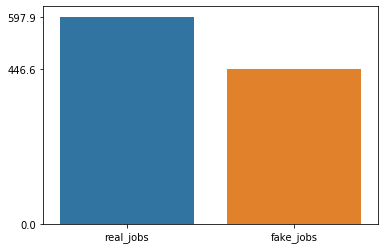

In [57]:
f_df = job_df[job_df.fraudulent == True]
r_df = job_df[job_df.fraudulent == False]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def feature_extraction(column, normalize):
    real = r_df[column].mean() 
    fake = f_df[column].mean() 
    print(f'Feature : {column}  real jobs: {real}  fake jobs: {fake}')
    x =  pd.DataFrame({"real_jobs": real, "fake_jobs" : fake}, index = [0])
    sns.barplot(data = x, label = column)
    
    if normalize is True:
        plt.yticks([0,min(real, fake), max(real, fake)])
    
feature_extraction(column = "requirements_len", normalize= True)

In [51]:
job_df.groupby(job_df['company_profile'].isnull()).mean()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,comp_prof_len
company_profile,,,,,,
False,8997.211502,0.036577,0.928767,0.528411,0.019146,761.852731
True,8690.681378,0.070738,0.207376,0.330109,0.177449,3.000000


<Figure size 432x288 with 0 Axes>

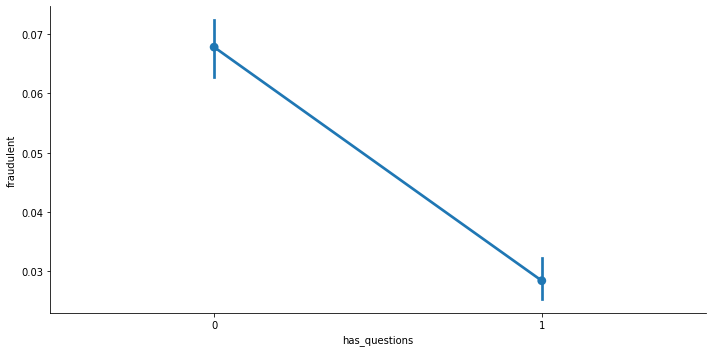

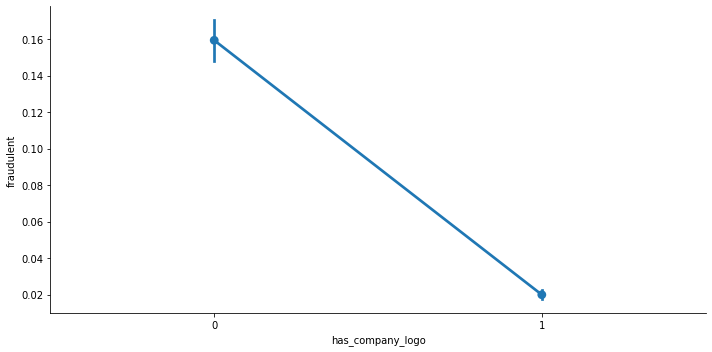

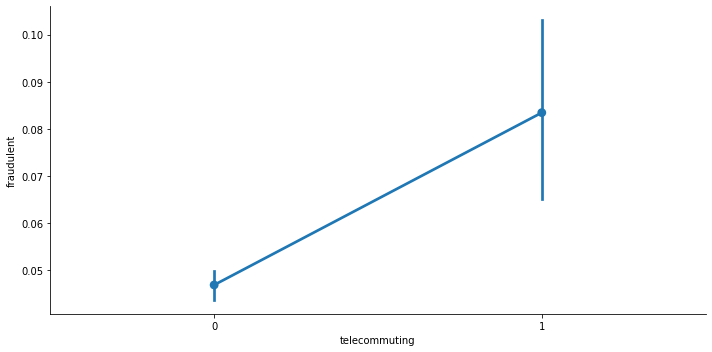

In [63]:
for i,col in enumerate(['has_questions', "has_company_logo", "telecommuting"]):
    plt.figure(i)
    sns.catplot(x=col, y= 'fraudulent', data= job_df, kind='point', aspect=2,)

Feature : comp_prof_len  real jobs: 641.2324556247796  fake jobs: 232.92494226327943


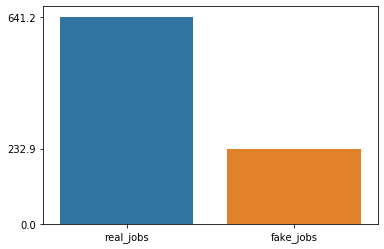

In [82]:
feature_extraction(column = "comp_prof_len", normalize= True)

In [80]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,comp_prof_len,description_len,requirements_len
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,885,905,852
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1286,2077,1433
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,879,355,1363
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,614,2600,1429
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1628,1520,757
